# 19.6 Making Predictions Assignment
In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.

## Import the Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Split Data and Train Model

In [3]:
# Target variable
Y = df['saleprice']

# Regression features
X = df[['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea',
      'garagecars', 'garagearea']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
        test_size=0.2, random_state=145)

# Add constant
X_train = sm.add_constant(X_train)
results = sm.OLS(Y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     577.5
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:10:23   Log-Likelihood:                -14003.
No. Observations:                1168   AIC:                         2.802e+04
Df Residuals:                    1161   BIC:                         2.806e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.923e+04   5574.404    -17.800      0.000    -1.1e+05   -8.83e+04
overallqual  2.448e+04   1203.593     20.338      0.000    2.21e+04    2.68e+04
totalbsmtsf    19.7644      4.766      4.147      0.000      10.414      29.115
firstflrsf      9.3375      5.524      1.690      0.091      -1.501      20.176
grlivarea      41.3804      2.962     13.969      0.000      35.568      47.193
garagecars   1.508e+04   3490.976      4.320      0.000    8230.989    2.19e+04
garagearea     18.4470     12.436      1.483      0.138      -5.953      42.847
==============================================================================
Omnibus:                      335.233   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26997.861
Skew:                          -0.265   Prob(JB):                         0.00
Kurtosis:                      26.547   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test Model

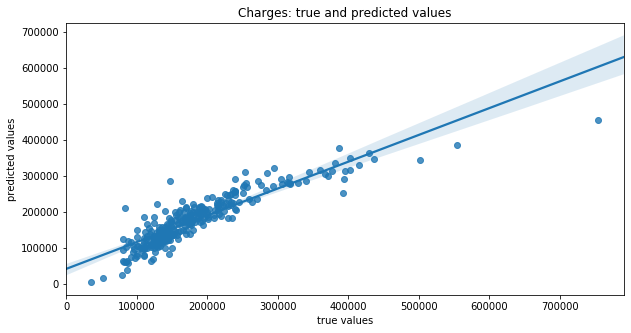

MAE: 24841.13525435707
MSE: 1473653333.794353
RMSE: 38388.19263516261
MAPE: 14.569858653066731


In [4]:
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)

plt.figure(figsize=(10,5))
sns.regplot(Y_test, y_pred)

plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")

plt.show()

print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
print('MSE: {}'.format(mse(Y_test, y_pred)))
print('RMSE: {}'.format(rmse(Y_test, y_pred)))
print('MAPE: {}'.format(np.mean(np.abs((Y_test-y_pred)/Y_test))*100))

In [5]:
results = sm.OLS(Y_test, X_test).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          1.13e-104
Time:                        13:10:23   Log-Likelihood:                -3476.7
No. Observations:                 292   AIC:                             6967.
Df Residuals:                     285   BIC:                             6993.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.148e+05      1e+04    -11.469      0.000   -1.34e+05   -9.51e+04
overallqual  2.116e+04   2412.678      8.769      0.000    1.64e+04    2.59e+04
totalbsmtsf    44.1266     10.073      4.381      0.000      24.299      63.954
firstflrsf     15.5180     11.922      1.302      0.194      -7.948      38.984
grlivarea      54.2520      6.104      8.887      0.000      42.237      66.267
garagecars   9900.8294   5924.854      1.671      0.096   -1761.195    2.16e+04
garagearea     12.3210     18.731      0.658      0.511     -24.547      49.189
==============================================================================
Omnibus:                       80.667   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              906.029
Skew:                           0.745   Prob(JB):                    1.81e-197
Kurtosis:                      11.500   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results of Model
Looking at the OLS of the training variables the adjusted r-squared was .748, which indicated a strong goodness of fit. The model predicted the housing prices well. As seen in the chart above, most of the prices were in the lower range of the spectrum. 

## Improving Performance of the Model
The target variable, sales price, is positively skewed. The target variable will be normalized via log transformation. Additionally, the 'garage area' variable will be dropped as it is not significant. The model will be analyzed below.

In [6]:
Y = np.log1p(df['saleprice'])

X.drop('garagearea', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
        test_size=0.2, random_state=145)

# Add constant
X_train = sm.add_constant(X_train)
results = sm.OLS(Y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     836.0
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:10:23   Log-Likelihood:                 309.59
No. Observations:                1168   AIC:                            -607.2
Df Residuals:                    1162   BIC:                            -576.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5545      0.026    398.577      0.000      10.502      10.606
overallqual     0.1337      0.006     23.315      0.000       0.122       0.145
totalbsmtsf     0.0001   2.25e-05      4.668      0.000    6.09e-05       0.000
firstflrsf    4.15e-05   2.63e-05      1.579      0.115   -1.01e-05    9.31e-05
grlivarea       0.0002   1.41e-05     12.922      0.000       0.000       0.000
garagecars      0.1216      0.009     12.988      0.000       0.103       0.140
==============================================================================
Omnibus:                      645.975   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13501.138
Skew:                          -2.100   Prob(JB):                         0.00
Kurtosis:                      19.117   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

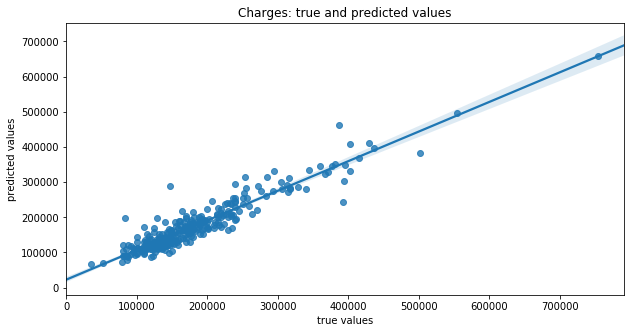

MAE: 20828.410023998837
MSE: 880409714.931629
RMSE: 29671.698888530616
MAPE: 12.156841939349935


In [7]:
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)
y_pred = np.expm1(y_pred)
Y_test = np.expm1(Y_test)

plt.figure(figsize=(10,5))
sns.regplot(Y_test, y_pred)

plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")

plt.show()

print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
print('MSE: {}'.format(mse(Y_test, y_pred)))
print('RMSE: {}'.format(rmse(Y_test, y_pred)))
print('MAPE: {}'.format(np.mean(np.abs((Y_test-y_pred)/Y_test))*100))

In [8]:
results = sm.OLS(Y_test, X_test).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     268.8
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          8.12e-106
Time:                        13:10:24   Log-Likelihood:                -3476.9
No. Observations:                 292   AIC:                             6966.
Df Residuals:                     286   BIC:                             6988.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.145e+05   9986.697    -11.463      0.000   -1.34e+05   -9.48e+04
overallqual  2.103e+04   2402.137      8.754      0.000    1.63e+04    2.58e+04
totalbsmtsf    44.0494     10.063      4.378      0.000      24.243      63.856
firstflrsf     16.5634     11.803      1.403      0.162      -6.669      39.796
grlivarea      54.1944      6.098      8.888      0.000      42.192      66.196
garagecars   1.293e+04   3723.908      3.472      0.001    5600.438    2.03e+04
==============================================================================
Omnibus:                       80.919   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              896.313
Skew:                           0.754   Prob(JB):                    2.33e-195
Kurtosis:                      11.450   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results of Improved Model
Looking at the OLS of the training variables the adjusted r-squared was .821, which indicated an improved goodness of fit. Additionally, the MAE, MSE, RMSE, and MAPE all decreased in comparision to the original model. The improved model is the stronger model when comparing goodness of fit. 